In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import os
import IPython

Text(0.5, 1.0, 'Raw Data')

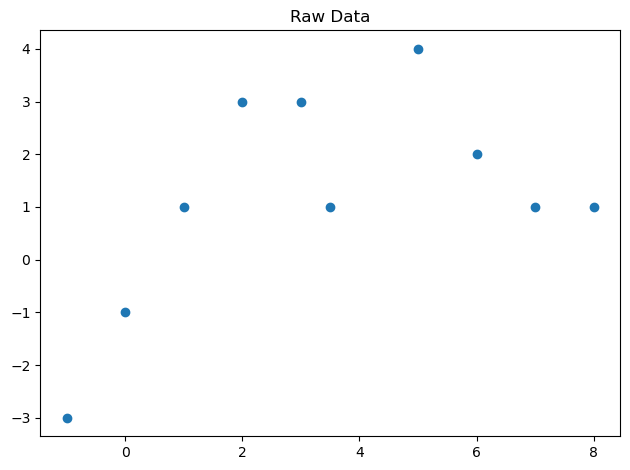

In [3]:
file = np.loadtxt('HW01_data.txt',skiprows= 1)

plt.scatter(file[:,0],file[:,1])
plt.title("Raw Data")

In [ ]:
print("hi from ipad")